In [5]:
#from prototype2_SizeSlabModel import ASTroCATclone #, new_plot

#from prototype2_SizeSlabModel_Copy1 import ASTroCATclone as ASTroCATclone_Tropical #, new_plot

import sys
sys.path.append('../../../phydra_OSM/')

from phydra.aux import sliceparams, sliceoffparams, checkreplaceparam
from phydra.forcing import Forcing

In [6]:
import pickle
filehandler = open('forcing_47_minus20.obj', 'rb') 
forx_temperate = pickle.load(filehandler)

In [7]:
filehandler = open('forcing_0_minus20.obj', 'rb') 
forx_tropical = pickle.load(filehandler)

In [8]:
import numpy as np
import xarray as xr
import xsimlab as xs
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [10]:
#from xsimlab.monitoring import ProgressBar

#with ProgressBar(frontend='console'):
#    model_out = model_in.xsimlab.run(model=ASTroCATclone)

In [11]:
#model_out.to_netcdf('SSS_token_tropical.nc')

#import pickle 
#file_forx = open('SSS_token_temperate.obj', 'wb') 
#pickle.dump(model_out, file_forx)

In [12]:
import pickle
filehandler = open('SSS_token_temperate.obj', 'rb') 
model_out_temperate = pickle.load(filehandler)

In [13]:
filehandler = open('SSS_token_tropical.obj', 'rb') 
model_out_tropical = pickle.load(filehandler)

In [14]:
model_out_temperate

<xarray.Dataset>
Dimensions:             (component: 42, flexComponent: 20, time: 328500)
Coordinates:
  * time                (time) float64 1.0 1.017 1.033 ... 5.475e+03 5.475e+03
Dimensions without coordinates: component, flexComponent
Data variables:
    D__component_label  <U1 'D'
    D__initVal          float64 0.1
    D__remin_rate       float64 0.15
    N__component_label  <U1 'N'
    N__initVal          int64 1
    N__supplyrate       int64 5
    P__NP               int64 20
    P__OptI             int64 20
    P__PMaxEsd          int64 50
    P__PMinEsd          float64 0.5
    P__component_label  <U1 'P'
    P__initVal          int64 1
    P__kc               float64 0.3
    P__kw               float64 0.4
    P__m                float64 0.01
    P__size             (flexComponent) float64 0.5 0.6371 0.8119 ... 39.24 50.0
    Z__KsZ              int64 7
    Z__component_label  <U1 'Z'
    Z__deltaxprey       float64 0.25
    Z__epsilon          float64 0.33
    Z__f_eg             float64 0.33
    Z__initVal          int64 1
    Z__size             (flexComponent) float64 0.6246 0.9639 ... 2.375e+03
    Z__zeta             float64 0.1
    env__component      (component) <U3 'N' 'P0' 'P1' 'P2' ... 'Z17' 'Z18' 'Z19'
    env__kappa          float64 0.1
    env__stateout       (time, component) float64 1.0 0.05 ... 3.519e-86
    physx__lat          int64 47
    physx__lon          int64 -20
    physx__rbb          float64 2.0

In [ ]:
"""
model_in_batch = model_in.xsimlab.update_vars(
    model=ASTroCATclone_Tropical,
    input_vars={'Z__KsZ': ('batch', [1.0, 2.5, 3.5, 4.5, 6])}
    )

with ProgressBar(frontend='console'):
    model_out_batch = model_in_batch.xsimlab.run(model=ASTroCATclone_Tropical, parallel=True)
"""

In [72]:
def lighten_color(color, amount=0.2):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [67]:
# model_out = model_in.xsimlab.run(model=ASTroCATclone_Tropical, parallel=True)

In [68]:
#model_out = model_in.xsimlab.run(model=ASTroCATclone)

In [69]:
#model_out = xr.load_dataset('SSS_plotoutput_01.nc')

In [155]:
def new_plot(modeloutput, forcingverif, Pnum, i, gs,fig):
   
    data_coordfix = modeloutput.set_index(component = 'env__component', P__sizes='P__size', Z__sizes='Z__size')

    P_out = data_coordfix.sel(component=['P'+str(i) for i in range(Pnum)])
    Z_out = data_coordfix.sel(component=['Z'+str(i) for i in range(Pnum)])
    N_out = data_coordfix.sel(component='N')
    D_out = data_coordfix.sel(component='D')

    resolution = 10
    resmpl_step = 1


    P_pico = P_out.env__stateout[:,P_out.P__sizes.values<2]
    mask = ((P_out.P__sizes.values >= 2) & (P_out.P__sizes.values <= 20))
    P_nano = P_out.env__stateout[:,mask]
    mask2 = ((P_out.P__sizes.values >= 20) & (P_out.P__sizes.values <= 50))
    P_micro = P_out.env__stateout[:,mask2]
    ##########
    
    
    P_pico_sum = P_pico.sum(dim='component')
    P_nano_sum = P_nano.sum(dim='component')
    P_micro_sum = P_micro.sum(dim='component')
    
    Z_out_sum = Z_out.sum(dim='component')
    
    ##########
    P_pico_sum_ly = P_pico_sum[P_pico_sum.time > 365*10]
    P_nano_sum_ly = P_nano_sum[P_nano_sum.time > 365*10]
    P_micro_sum_ly = P_micro_sum[P_micro_sum.time > 365*10]

    N_out_ly = N_out.env__stateout[N_out.time > 365*10]
    D_out_ly = D_out.env__stateout[D_out.time > 365*10]
    Z_out_ly = Z_out_sum.env__stateout[Z_out.time > 365*10]

    P_pico_sum_ly_yday = P_pico_sum_ly.assign_coords(time=np.mod(P_pico_sum_ly.time, 365.))
    P_nano_sum_ly_yday = P_nano_sum_ly.assign_coords(time=np.mod(P_nano_sum_ly.time, 365.))
    P_micro_sum_ly_yday = P_micro_sum_ly.assign_coords(time=np.mod(P_micro_sum_ly.time, 365.))

    N_out_ly_yday = N_out_ly.assign_coords(time=np.mod(N_out_ly.time, 365.))
    D_out_ly_yday = D_out_ly.assign_coords(time=np.mod(D_out_ly.time, 365.))
    Z_out_ly_yday = Z_out_ly.assign_coords(time=np.mod(Z_out_ly.time, 365.))
    #################

    import datetime

    seconds = P_pico_sum_ly_yday.time.values * 60 * 60 * 24

    dt_array = [datetime.datetime.utcfromtimestamp(i) for i in seconds]
    #################

    P_pico_sum_ly_dt = P_pico_sum_ly_yday.assign_coords(time=dt_array).to_dataset()
    P_nano_sum_ly_dt = P_nano_sum_ly_yday.assign_coords(time=dt_array).to_dataset()
    P_micro_sum_ly_dt = P_micro_sum_ly_yday.assign_coords(time=dt_array).to_dataset()

    N_out_ly_dt = N_out_ly_yday.assign_coords(time=dt_array).to_dataset()
    D_out_ly_dt = D_out_ly_yday.assign_coords(time=dt_array).to_dataset()
    Z_out_ly_dt = Z_out_ly_yday.assign_coords(time=dt_array).to_dataset()
    
    timeagg = 'time.dayofyear'
    P_pico_yagg = P_pico_sum_ly_dt.groupby(timeagg).mean()
    P_pico_yagg_sd = P_pico_sum_ly_dt.groupby(timeagg).std()

    P_nano_yagg = P_nano_sum_ly_dt.groupby(timeagg).mean()
    P_nano_yagg_sd = P_nano_sum_ly_dt.groupby(timeagg).std()

    P_micro_yagg = P_micro_sum_ly_dt.groupby(timeagg).mean()
    P_micro_yagg_sd = P_micro_sum_ly_dt.groupby(timeagg).std()

    N_out_yagg = N_out_ly_dt.groupby(timeagg).mean()
    N_out_yagg_sd = N_out_ly_dt.groupby(timeagg).std()

    D_out_yagg = D_out_ly_dt.groupby(timeagg).mean()
    D_out_yagg_sd = D_out_ly_dt.groupby(timeagg).std()
    
    Z_out_yagg = Z_out_ly_dt.groupby(timeagg).mean()
    Z_out_yagg_sd = Z_out_ly_dt.groupby(timeagg).std()

    # conversion
    CtoN = 106/16
    molarmassC = 12.0107
    CBMconvert = molarmassC * CtoN
    
    ##########
    dayspermonth = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    dpm_cumsum = np.cumsum(dayspermonth) - np.array(dayspermonth)/2 #- 15
    
    #new
    dpy = np.arange(1,366)

    ##########

    #c to N # 106/16
    labels = {'model_pico':'darkgreen','model_nano':'green','model_micro':'lightgreen', 'model_nuts':'#955196','model_det':'brown','model_Z':'darkorange','data':'grey'}
    markers = {'pico':'x', 'nano':'^', 'micro':'s', 'nuts':'s', 'det':'s'}

    #fig, ax = plt.subplots(1, 3, sharey='row')

    ax0 = fig.add_subplot(gs[1, i])
    ax1 = fig.add_subplot(gs[2, i])#, sharey=ax0)
    ax2 = fig.add_subplot(gs[3, i])#, sharey=ax0)
    ax3 = fig.add_subplot(gs[1, i+3])
    ax4 = fig.add_subplot(gs[2, i+3])
    ax5 = fig.add_subplot(gs[3, i+3])

    def plotdataanderr(axe,data,error,forcing, color, fxlab, modlab):
        if forcing is not None:
            axe.scatter(dpm_cumsum, forcing, label=fxlab, c=labels['data'], zorder=1)
        axe.plot(dpy, data, label=modlab, c=color, zorder=3)
        axe.fill_between(dpy, data-error, data+error,color=color, alpha=0.3, zorder=2)
        
            
    plotdataanderr(ax2, P_pico_yagg.env__stateout, P_pico_yagg_sd.env__stateout, np.array(forcingverif.verif.c_picop) /CBMconvert, labels['model_pico'], 'satellite', 'model')

    plotdataanderr(ax1, P_nano_yagg.env__stateout, P_nano_yagg_sd.env__stateout, np.array(forcingverif.verif.c_nanop) /CBMconvert, labels['model_nano'], 'satellite', 'model')    
    
    plotdataanderr(ax0, P_micro_yagg.env__stateout, P_micro_yagg_sd.env__stateout, np.array(forcingverif.verif.c_microp) /CBMconvert, labels['model_micro'], 'satellite', 'model')
    
    plotdataanderr(ax3, N_out_yagg.env__stateout, N_out_yagg_sd.env__stateout, np.array(forcingverif.verif.N), labels['model_nuts'], 'WOA data', 'model')
    
    plotdataanderr(ax4, Z_out_yagg.env__stateout, Z_out_yagg_sd.env__stateout, None, labels['model_Z'], '', 'model Z')
    
    plotdataanderr(ax5, D_out_yagg.env__stateout, D_out_yagg_sd.env__stateout, None, labels['model_det'], '', 'model D')
    
    # LABELS
    if i == 0:
    #    ax2.set_title('Pico (0.5 - 2 µm)')
    #    ax1.set_title('Nano (2 - 20 µm)')
        ax0.set_title('Temperate location',c='blue')
        ax3.set_title('Temperate location',c='blue')
    #    ax4.set_title('Z')
    #    ax5.set_title('D')
    
    if i == 1:
        ax0.set_title('Tropical location', c='red')
        ax3.set_title('Tropical location', c='red')
    
    if i == 0:
        ax2.set_xlabel('Day in year [days]')
        #ax1.set_xlabel('[days]')
        #ax0.set_xlabel('[days]')
        #ax3.set_xlabel('[days]')
        #ax4.set_xlabel('[days]')
        ax5.set_xlabel('[days]')
        
    if i == 1:
        ax2.set_xlabel('[days]')
        #ax1.set_xlabel('[days]')
        #ax0.set_xlabel('[days]')
        #ax3.set_xlabel('[days]')
        #ax4.set_xlabel('[days]')
        ax5.set_xlabel('[days]')
    
    if i == 0:
        ax2.set_ylabel('Picoplankton  [µM N]')
        ax1.set_ylabel('Nanoplankton  [µM N]')
        ax0.set_ylabel('Microplankton  [µM N]')
        ax3.set_ylabel('Nitrogen [µM N]')
        ax4.set_ylabel('Zooplankton [µM N]')
        ax5.set_ylabel('Detritus [µM N]')
        

    xlim = (1, 365)
    from matplotlib.ticker import MaxNLocator
    for axe in [ax2, ax1, ax0, ax3, ax4, ax5]:
        plt.setp(axe, xticks=[1,60,120,180,240,300,365], xlim=xlim)
        axe.grid(True, alpha=0.5)
        axe.get_yaxis().set_major_locator(MaxNLocator(nbins=5))
        axe.tick_params(top=False, right=True, direction="in")
        axe.set_ylim(bottom=0)
        if i == 1:
            axe.legend(fontsize='x-small')
            plt.setp(axe.get_yticklabels(), visible=False)
    
    for axe in [ax2,ax0]:
        axe.set_ylim(0,.5)
    
    for axe in [ax1]:
        axe.set_ylim(0,.5)
        axe.set_ylim(0,.5)
    
    for axe in [ax3]:
        axe.set_ylim(0,10)
    
    for axe in [ax4,ax5]:
        axe.set_ylim(0,1.5)
        
    for axe in [ax0, ax1,  ax3, ax4]:
        plt.setp(axe.get_xticklabels(), visible=False)
            
#ax1[i].set_title('Temperate Location', color='blue')
#ax1[i].set_title('Tropical Location', color='red')
    
    # Defining custom 'xlim' and 'ylim' values.

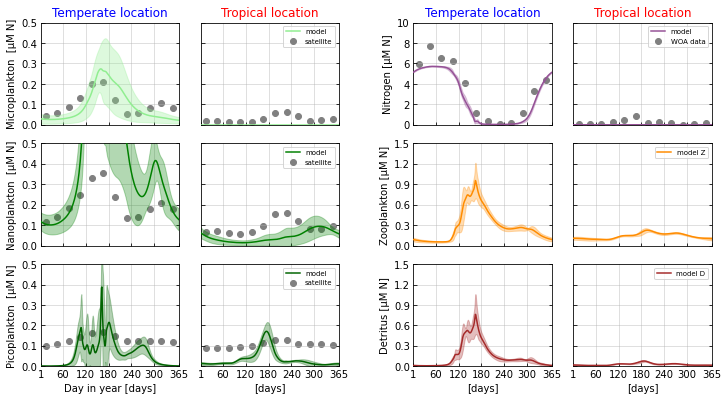

In [156]:
plt.rcParams['figure.figsize'] = [10, 7]

fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(nrows=4, ncols=5, hspace=0, wspace=0, width_ratios=[1,1,0.1,1,1])

new_plot(model_out_temperate,forx_temperate, 20, 0, gs, fig)
new_plot(model_out_tropical,forx_tropical, 20, 1, gs, fig)

#trop_lab = fig.add_subplot(gs[0, 0])
#trop_lab.axis('off')
#trop_lab.text(0.,0.1, "Temperate Location", size=12, rotation='vertical', c='blue')

#temp_lab = fig.add_subplot(gs[1, 0])
#temp_lab.axis('off')
#temp_lab.text(0.,0.12, "Tropical Location", size=12, rotation='vertical', c='red')

plt.savefig('../04_sizestruct_slab.pdf', bbox_inches='tight')

In [ ]:
#00876c green
#63b179
#aed987
#ffff9d
#fcc267
#ef8250
#d43d51 red
#+ blue

In [11]:
2 - 0.5

1.5

In [12]:
20 - 2

18

In [13]:
50 - 20

30

In [14]:
20/50

0.4

In [16]:
2 / 20

0.1

In [18]:
0.5 / 2

0.25